<a href="https://colab.research.google.com/github/silvi-no26/c_vision/blob/main/computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-38-977fcbd33deb>:4: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  sk.io.imshow(IC)
<ipython-input-38-977fcbd33deb>:5: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  sk.io.show()


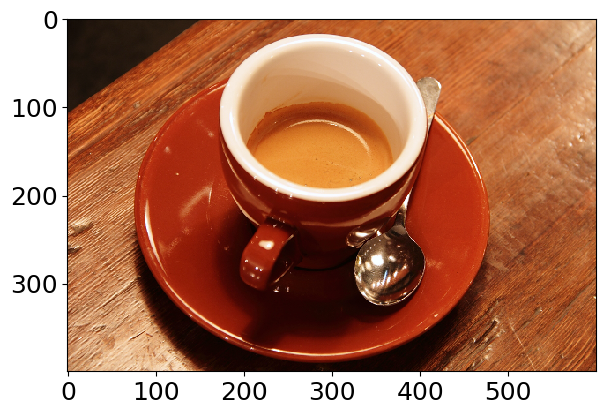

M = 400 columns, N = 600 rows, NC = 3 color channels


In [38]:
#Load of coffee image
import skimage as sk
IC = sk.data.coffee()
sk.io.imshow(IC)
sk.io.show()
print('M = {} columns, N = {} rows, NC = {} color channels'.format(*IC.shape))

In [39]:
IC.shape

(400, 600, 3)

In [40]:
#Convert to gray scale
IG = sk.color.rgb2gray(IC)
IG.shape

(400, 600)

<ipython-input-41-c51bcfb36ac3>:1: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  sk.io.imshow(IG)
<ipython-input-41-c51bcfb36ac3>:2: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  sk.io.show()


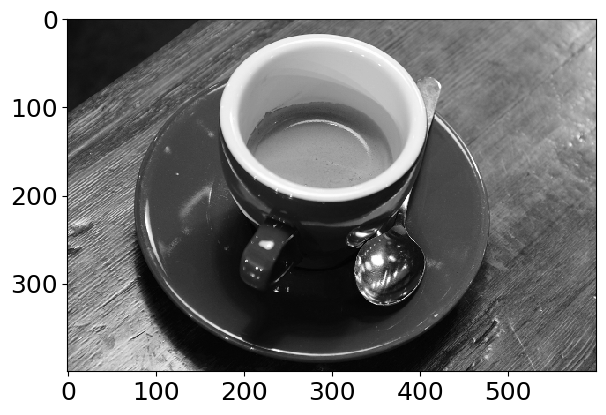

In [41]:
sk.io.imshow(IG)
sk.io.show()

In [42]:
from skimage.util import img_as_ubyte
IGB = img_as_ubyte(IG)

In [43]:
np.max(IGB)

np.uint8(255)

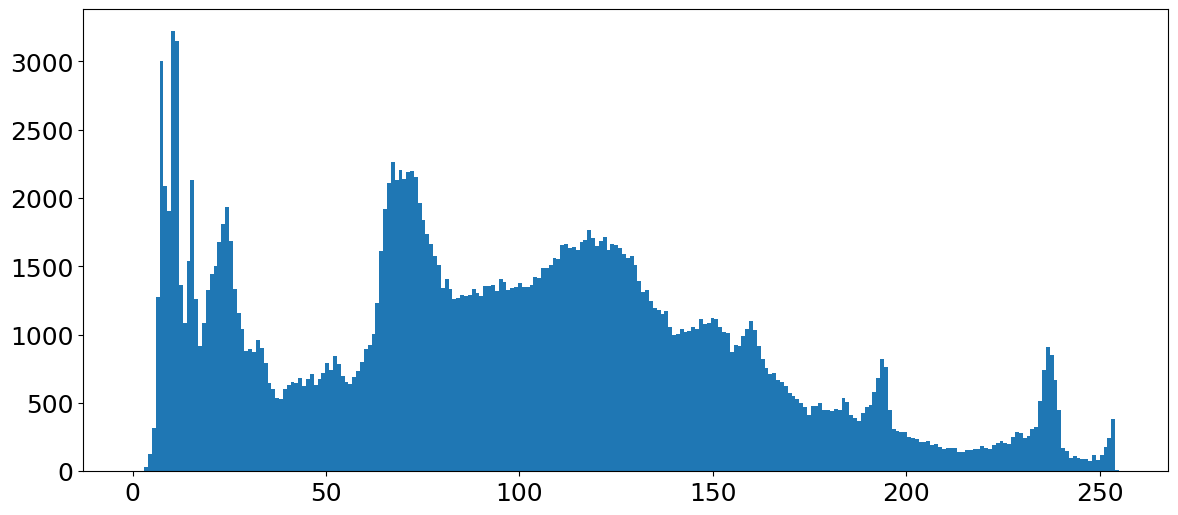

In [44]:
import matplotlib.pyplot as plt
import numpy as np

# reshape the uint8 image as 1d array:
v = IGB.reshape(IGB.shape[0]*IGB.shape[1],1)

fig = plt.figure(figsize=(14, 6))
plt.hist(v, bins=256,density=False)
plt.show()

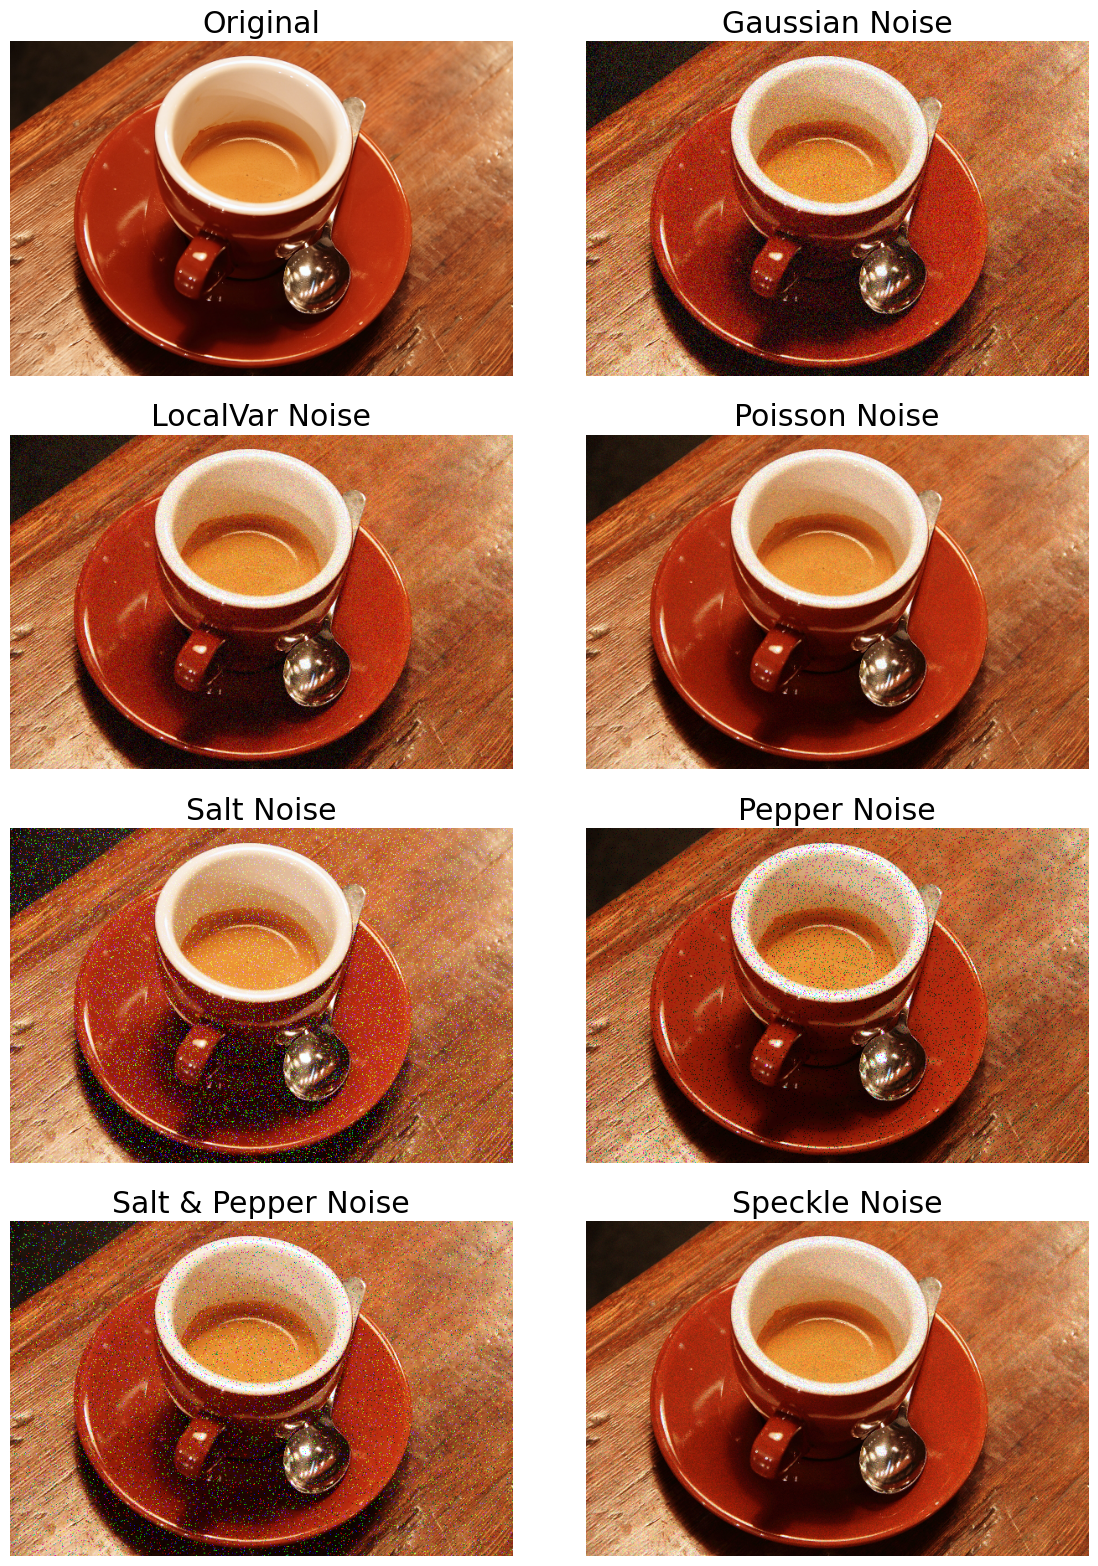

In [46]:
from skimage.util import random_noise
from skimage.util import img_as_ubyte
# 1. Gaussian noise
IC_gaussian = random_noise(IC, mode='gaussian', mean=0, var=0.01)
IC_gaussian = img_as_ubyte(IC_gaussian)

# Generate a local variance array (same shape as the image)
local_vars = np.random.uniform(0, 0.01, size=IC.shape)

# 2. Local Variance noise
IC_localvar = random_noise(IC, mode='localvar', local_vars=local_vars)
IC_localvar = img_as_ubyte(IC_localvar)

# 3. Poisson noise
IC_poisson = random_noise(IC, mode='poisson')
IC_poisson = img_as_ubyte(IC_poisson)

# 4. Salt noise
IC_salt = random_noise(IC, mode='salt', amount=0.05)
IC_salt = img_as_ubyte(IC_salt)

# 5. Pepper noise
IC_pepper = random_noise(IC, mode='pepper', amount=0.05)
IC_pepper = img_as_ubyte(IC_pepper)

# 6. Salt & Pepper noise
IC_s_and_p = random_noise(IC, mode='s&p', amount=0.05, salt_vs_pepper=0.5)
IC_s_and_p = img_as_ubyte(IC_s_and_p)

# 7. Speckle noise
IC_speckle = random_noise(IC, mode='speckle', mean=0, var=0.01)
IC_speckle = img_as_ubyte(IC_speckle)


fig, axs = plt.subplots(4, 2, figsize=(12, 16))

# Original image
axs[0, 0].imshow(IC)
axs[0, 0].set_title("Original")
axs[0, 0].axis('off')

# Gaussian noise
axs[0, 1].imshow(IC_gaussian)
axs[0, 1].set_title("Gaussian Noise")
axs[0, 1].axis('off')

# Local Variance noise
axs[1, 0].imshow(IC_localvar)
axs[1, 0].set_title("LocalVar Noise")
axs[1, 0].axis('off')

# Poisson noise
axs[1, 1].imshow(IC_poisson)
axs[1, 1].set_title("Poisson Noise")
axs[1, 1].axis('off')

# Salt noise
axs[2, 0].imshow(IC_salt)
axs[2, 0].set_title("Salt Noise")
axs[2, 0].axis('off')

# Pepper noise
axs[2, 1].imshow(IC_pepper)
axs[2, 1].set_title("Pepper Noise")
axs[2, 1].axis('off')

# Salt & Pepper noise
axs[3, 0].imshow(IC_s_and_p)
axs[3, 0].set_title("Salt & Pepper Noise")
axs[3, 0].axis('off')

# Speckle noise
axs[3, 1].imshow(IC_speckle)
axs[3, 1].set_title("Speckle Noise")
axs[3, 1].axis('off')


plt.tight_layout()
plt.show()